In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
loan_df= pd.read_csv('/content/loan_data.csv')

In [5]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<Axes: xlabel='person_age', ylabel='Count'>

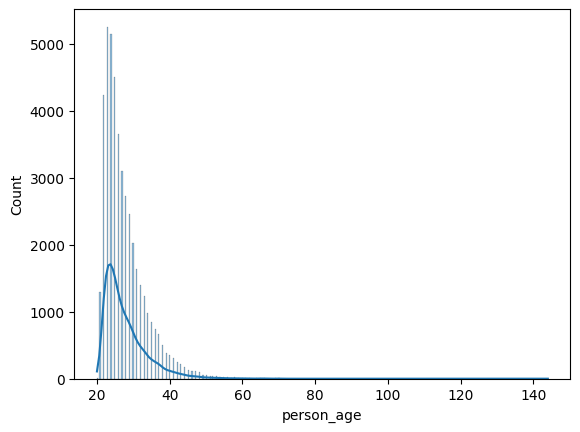

In [7]:
#EDA on column
sns.histplot(loan_df['person_age'], kde=True)

In [8]:
print(loan_df['person_gender'].value_counts())
print(loan_df['person_education'].unique())
print(loan_df['loan_intent'].unique())

person_gender
male      24841
female    20159
Name: count, dtype: int64
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


<Axes: ylabel='person_income'>

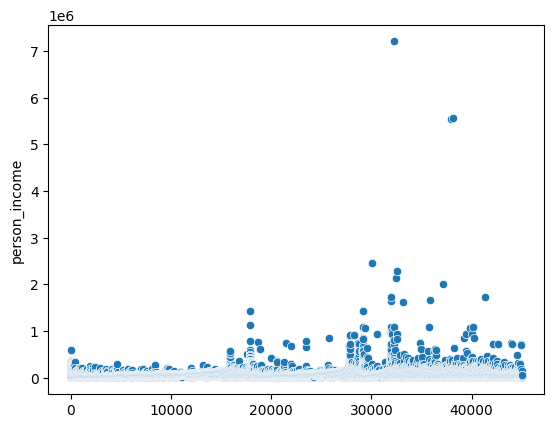

In [9]:
sns.scatterplot(loan_df['person_income'])

In [10]:
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
loan_df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [12]:
temp_df= loan_df[loan_df['loan_status']==1]

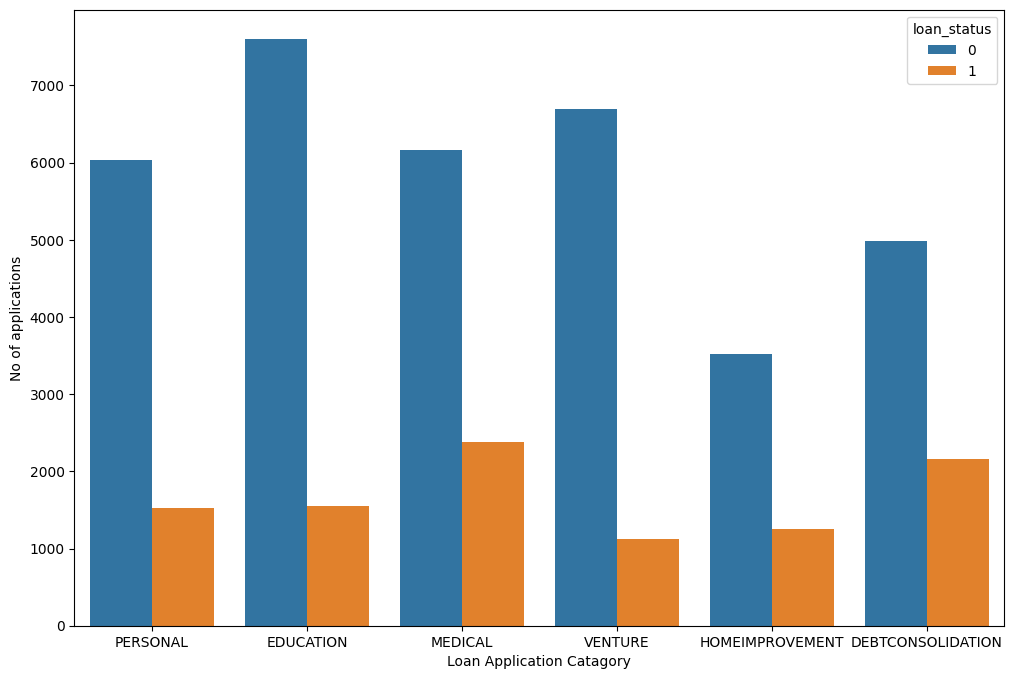

In [13]:
#loan approval rate for each loan intent
fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(x='loan_intent', hue= 'loan_status', data=loan_df)
ax.set(xlabel = "Loan Application Catagory", ylabel = "No of applications")
plt.show()

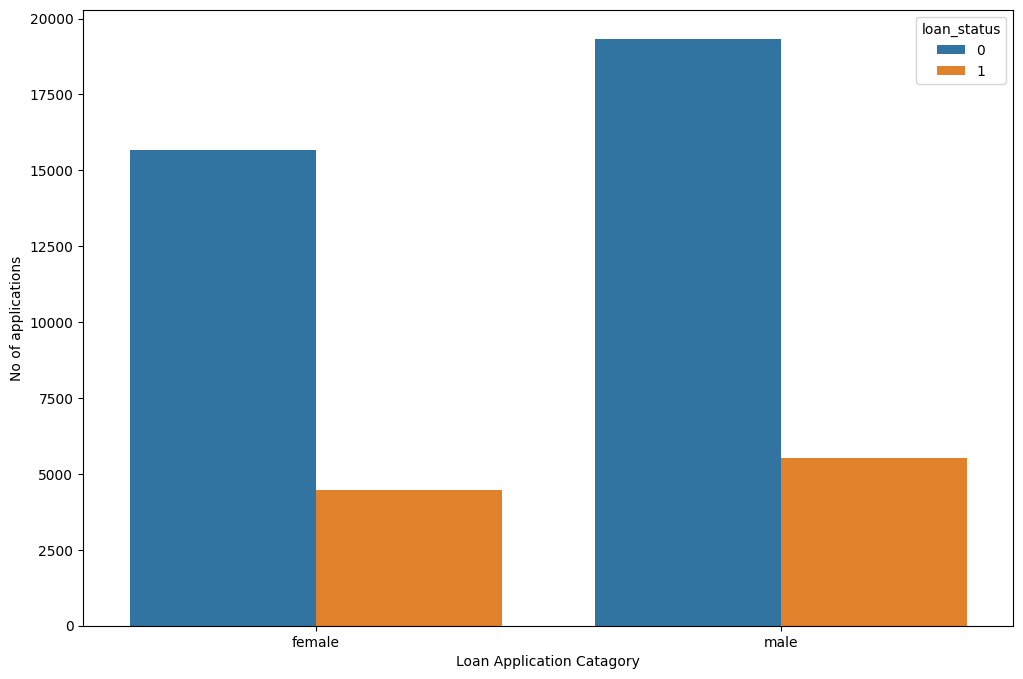

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.countplot(x='person_gender', hue= 'loan_status', data=loan_df)
ax.set(xlabel = "Loan Application Catagory", ylabel = "No of applications")
plt.show()

In [15]:
temp_df.groupby(['loan_intent','person_education'])['loan_status'].sum()

loan_intent        person_education
DEBTCONSOLIDATION  Associate           566
                   Bachelor            664
                   Doctorate            32
                   High School         569
                   Master              332
EDUCATION          Associate           404
                   Bachelor            461
                   Doctorate            19
                   High School         437
                   Master              231
HOMEIMPROVEMENT    Associate           371
                   Bachelor            345
                   Doctorate            15
                   High School         319
                   Master              208
MEDICAL            Associate           599
                   Bachelor            699
                   Doctorate            44
                   High School         655
                   Master              381
PERSONAL           Associate           419
                   Bachelor            500
                   Doctorate            20
                   High School         372
                   Master              210
VENTURE            Associate           291
                   Bachelor            349
                   Doctorate            12
                   High School         319
                   Master              157
Name: loan_status, dtype: int64

In [16]:
cat_col= [col for col in loan_df.columns if loan_df[col].dtype == 'object']
num_col= [col for col in loan_df.columns if loan_df[col].dtype != 'object']

<Axes: >

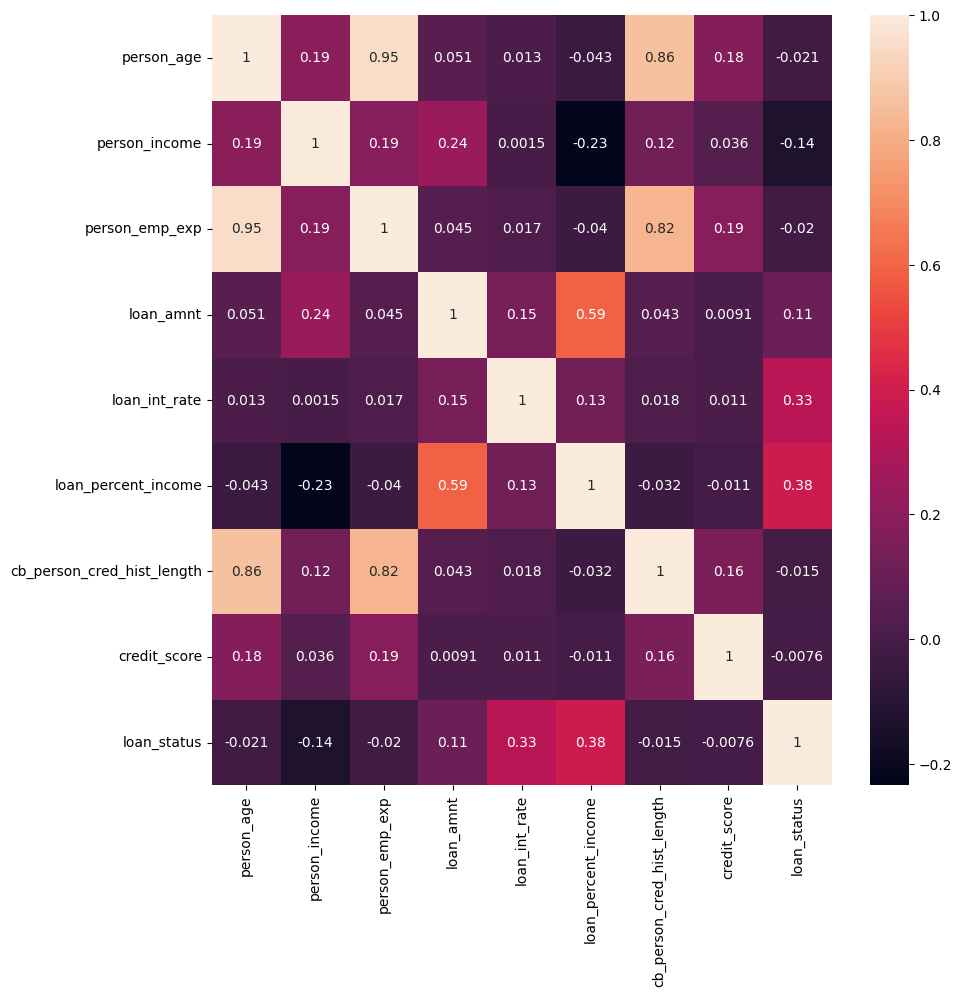

In [17]:
_, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(loan_df[num_col].corr(),annot=True, ax=ax)

In [18]:
#unique value of category column
for col in cat_col:
  print(f'Unique value for {col}',loan_df[col].unique())

Unique value for person_gender ['female' 'male']
Unique value for person_education ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
Unique value for person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
Unique value for loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
Unique value for previous_loan_defaults_on_file ['No' 'Yes']


In [20]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [21]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [22]:
loan_df['person_gender']=loan_df['person_gender'].replace({'male':1, 'female':0})
loan_df['previous_loan_defaults_on_file']= loan_df['previous_loan_defaults_on_file'].replace({'No':0,'Yes':1})
encoder = OrdinalEncoder(categories=[['Doctorate', 'Master', 'Bachelor', 'Associate', 'High School']])
loan_df['person_education']= encoder.fit_transform(loan_df[['person_education']])

<ipython-input-22-b3a8862c0b81>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['person_gender']=loan_df['person_gender'].replace({'male':1, 'female':0})
<ipython-input-22-b3a8862c0b81>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df['previous_loan_defaults_on_file']= loan_df['previous_loan_defaults_on_file'].replace({'No':0,'Yes':1})


In [23]:
home_encoder= OrdinalEncoder(categories=[['OWN','RENT','MORTGAGE','OTHER']])
loan_df['person_home_ownership']=home_encoder.fit_transform(loan_df[['person_home_ownership']])

In [24]:
#one hot encode the data

one_hot = pd.get_dummies(loan_df['loan_intent'])
# Drop column B as it is now encoded
loan_df = loan_df.drop('loan_intent',axis = 1)
# Join the encoded df
loan_df = loan_df.join(one_hot)


In [25]:
loan_df.replace({True:1, False:0}, inplace=True)

<ipython-input-25-bb15ff8b22f7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df.replace({True:1, False:0}, inplace=True)


In [26]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,1.0,71948.0,0,1.0,35000.0,16.02,0.49,3.0,561,0,1,0,0,0,0,1,0
1,21.0,0,4.0,12282.0,0,0.0,1000.0,11.14,0.08,2.0,504,1,0,0,1,0,0,0,0
2,25.0,0,4.0,12438.0,3,2.0,5500.0,12.87,0.44,3.0,635,0,1,0,0,0,1,0,0
3,23.0,0,2.0,79753.0,0,1.0,35000.0,15.23,0.44,2.0,675,0,1,0,0,0,1,0,0
4,24.0,1,1.0,66135.0,1,1.0,35000.0,14.27,0.53,4.0,586,0,1,0,0,0,1,0,0


Data Normalization

In [27]:
#normalize the dataset
from sklearn import preprocessing
d = preprocessing.normalize(loan_df.values, axis=0)
scaled_df = pd.DataFrame(d, columns=loan_df.columns)


In [28]:
scaled_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0.003650,0.000000,0.001666,0.002984,0.00000,0.003187,0.014376,0.006623,0.014024,0.002010,0.004167,0.000000,0.01,0.0,0.000000,0.0,0.000000,0.011507,0.0
1,0.003484,0.000000,0.006663,0.000509,0.00000,0.000000,0.000411,0.004605,0.002290,0.001340,0.003744,0.006614,0.00,0.0,0.010452,0.0,0.000000,0.000000,0.0
2,0.004148,0.000000,0.006663,0.000516,0.00174,0.006374,0.002259,0.005321,0.012593,0.002010,0.004717,0.000000,0.01,0.0,0.000000,0.0,0.010816,0.000000,0.0
3,0.003816,0.000000,0.003332,0.003308,0.00000,0.003187,0.014376,0.006296,0.012593,0.001340,0.005014,0.000000,0.01,0.0,0.000000,0.0,0.010816,0.000000,0.0
4,0.003982,0.006345,0.001666,0.002743,0.00058,0.003187,0.014376,0.005899,0.015169,0.002681,0.004353,0.000000,0.01,0.0,0.000000,0.0,0.010816,0.000000,0.0


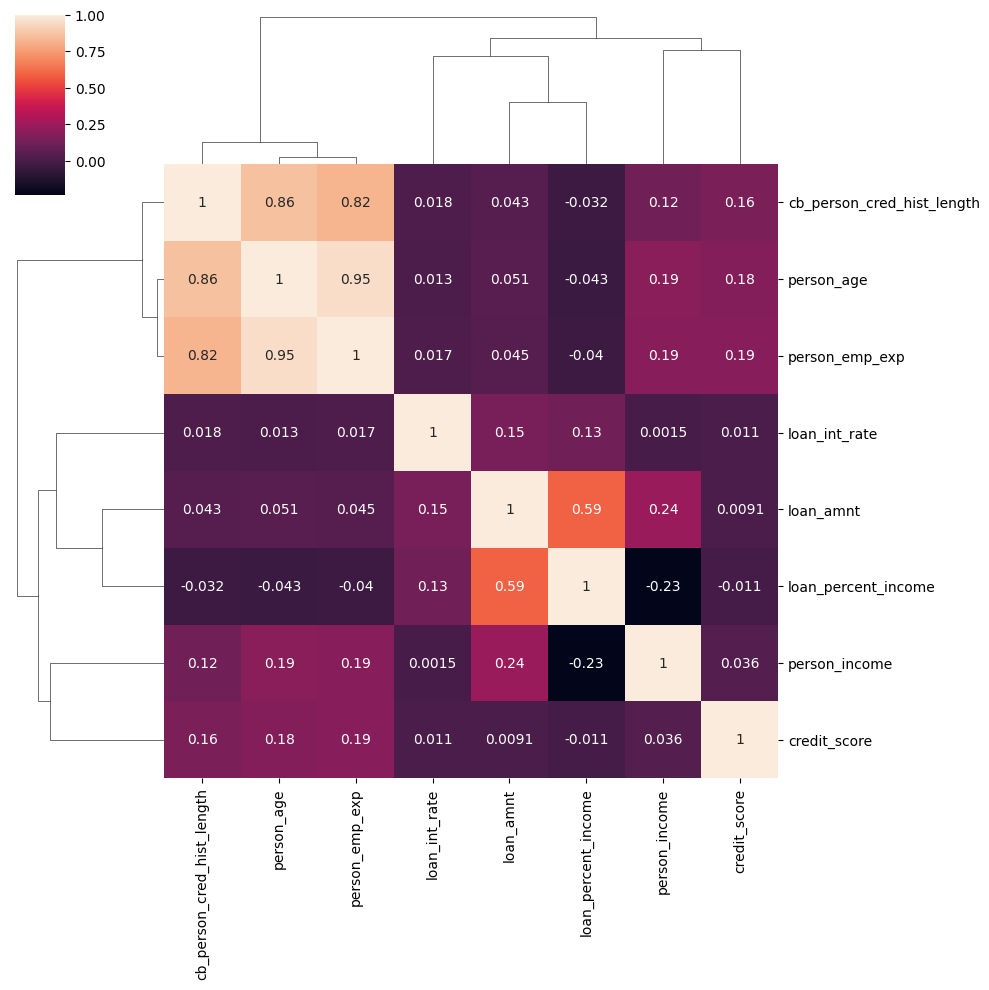

In [29]:
num_col.remove('loan_status')
sns.clustermap(loan_df[num_col].corr(),annot=True)

# Model Bulding

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y= loan_df['loan_status']

In [32]:
temp_df=loan_df
#temp_df.drop("loan_status",inplace=True,axis=1)
X=temp_df

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model= LogisticRegression()

In [36]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=model.predict(X_test)

In [38]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [39]:
model.predict_proba(X_test)

array([[0.9962238 , 0.0037762 ],
       [0.8631663 , 0.1368337 ],
       [0.0022308 , 0.9977692 ],
       ...,
       [0.94833755, 0.05166245],
       [0.54590397, 0.45409603],
       [0.98156934, 0.01843066]])

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

[[6727  263]
 [ 345 1665]]
Accuracy Score:  0.9324444444444444


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6990
           1       0.86      0.83      0.85      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.90      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [44]:
y_pred_proba

array([0.0037762 , 0.1368337 , 0.9977692 , ..., 0.05166245, 0.45409603,
       0.01843066])

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

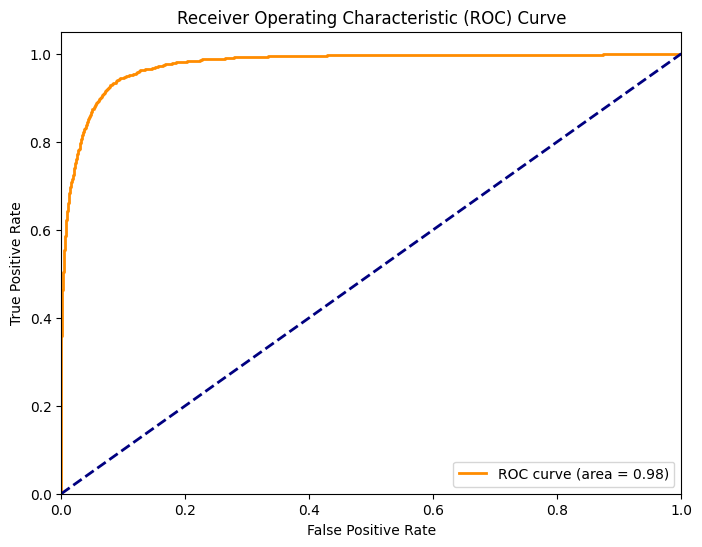

In [46]:
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


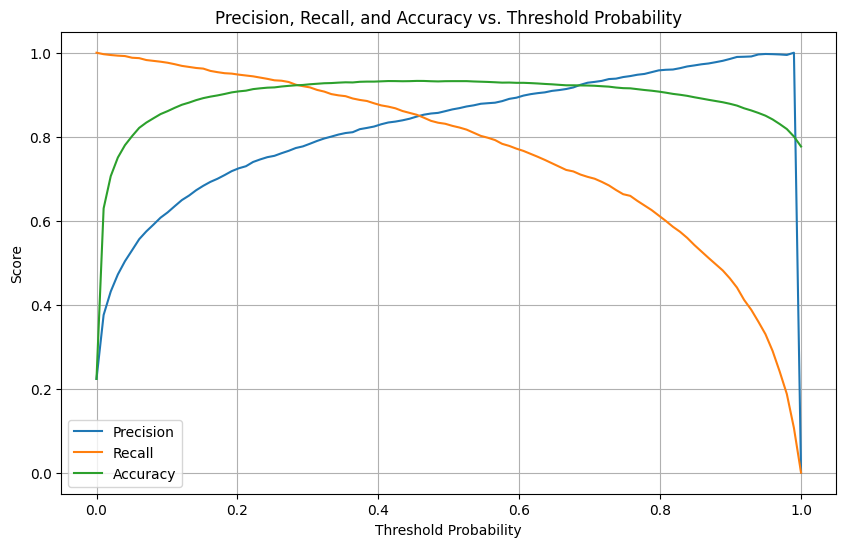

In [47]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot precision, recall, and accuracy against threshold probabilities
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

# The model of logistic regression provide 93% accuracy

In [ ]:
#model tuning
#normalize the dataset
#use cross validation
# take necessery dimenssion


In [ ]:
new_pred_level = np.where(y_pred_proba > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, new_pred_level))
print(accuracy_score(y_test, new_pred_level))
print(classification_report(y_test, new_pred_level))

[[6727  263]
 [ 345 1665]]
0.9324444444444444
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6990
           1       0.86      0.83      0.85      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.90      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,22.0,0,1.0,71948.0,0,1.0,35000.0,16.02,0.49,3.0,561,0,1,0,0,0,0,1,0
1,21.0,0,4.0,12282.0,0,0.0,1000.0,11.14,0.08,2.0,504,1,0,0,1,0,0,0,0
2,25.0,0,4.0,12438.0,3,2.0,5500.0,12.87,0.44,3.0,635,0,1,0,0,0,1,0,0
3,23.0,0,2.0,79753.0,0,1.0,35000.0,15.23,0.44,2.0,675,0,1,0,0,0,1,0,0
4,24.0,1,1.0,66135.0,1,1.0,35000.0,14.27,0.53,4.0,586,0,1,0,0,0,1,0,0


In [60]:
#remove dimession

#remove person_gender and
scaled_df.drop({'person_gender','person_emp_exp','person_education'}, inplace=True, axis=1)

KeyError: "['person_education', 'person_emp_exp', 'person_gender'] not found in axis"

In [70]:
temp_df=scaled_df
#temp_df.drop("loan_status",inplace=True,axis=1)
x_scaled=temp_df
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test= train_test_split(x_scaled,y, test_size=0.2, random_state=40)

In [71]:
temp_df

,person_age,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,0.003650,0.002984,0.003187,0.014376,0.006623,0.014024,0.002010,0.004167,0.000000,0.01,0.00000,0.000000,0.000000,0.000000,0.011507,0.0
1,0.003484,0.000509,0.000000,0.000411,0.004605,0.002290,0.001340,0.003744,0.006614,0.00,0.00000,0.010452,0.000000,0.000000,0.000000,0.0
2,0.004148,0.000516,0.006374,0.002259,0.005321,0.012593,0.002010,0.004717,0.000000,0.01,0.00000,0.000000,0.000000,0.010816,0.000000,0.0
3,0.003816,0.003308,0.003187,0.014376,0.006296,0.012593,0.001340,0.005014,0.000000,0.01,0.00000,0.000000,0.000000,0.010816,0.000000,0.0
4,0.003982,0.002743,0.003187,0.014376,0.005899,0.015169,0.002681,0.004353,0.000000,0.01,0.00000,0.000000,0.000000,0.010816,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.004479,0.001990,0.003187,0.006161,0.006474,0.008872,0.002010,0.004791,0.000000,0.01,0.00000,0.000000,0.000000,0.010816,0.000000,0.0
44996,0.006138,0.002729,0.003187,0.003697,0.005817,0.004007,0.007372,0.004613,0.000000,0.01,0.00000,0.000000,0.014459,0.000000,0.000000,0.0
44997,0.005475,0.002362,0.003187,0.001138,0.004142,0.001431,0.006702,0.004962,0.000000,0.01,0.01183,0.000000,0.000000,0.000000,0.000000,0.0
44998,0.004811,0.001375,0.003187,0.004929,0.005470,0.010303,0.004021,0.004487,0.000000,0.01,0.00000,0.010452,0.000000,0.000000,0.000000,0.0


In [72]:
model.fit(x_scaled_train, y_scaled_train)

LogisticRegression()

In [77]:
y_scaled_pred=model.predict(x_scaled_test)
y_scaled_pred

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
model.predict_proba(x_scaled_train)

array([[0.67400985, 0.32599015],
       [0.82883298, 0.17116702],
       [0.81396461, 0.18603539],
       ...,
       [0.81215122, 0.18784878],
       [0.82855759, 0.17144241],
       [0.6755216 , 0.3244784 ]])

In [80]:
print(confusion_matrix(y_scaled_test, y_scaled_pred))
print('Accuracy Score: ',accuracy_score(y_scaled_test, y_scaled_pred))
print(classification_report(y_scaled_test, y_scaled_pred))

[[6984    0]
 [2016    0]]
Accuracy Score:  0.776
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6984
           1       0.00      0.00      0.00      2016

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

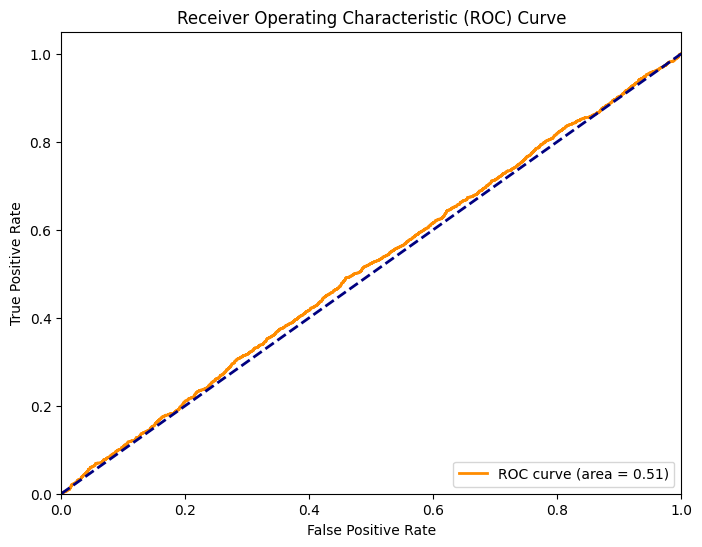

In [82]:
plt.figure(figsize=(8, 6))  # Create a new figure with a specified size
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')  # Plot the diagonal line representing random guessing
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set plot title
plt.legend(loc="lower right")  # Add legend to the plot
plt.show()  # Show the plot

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


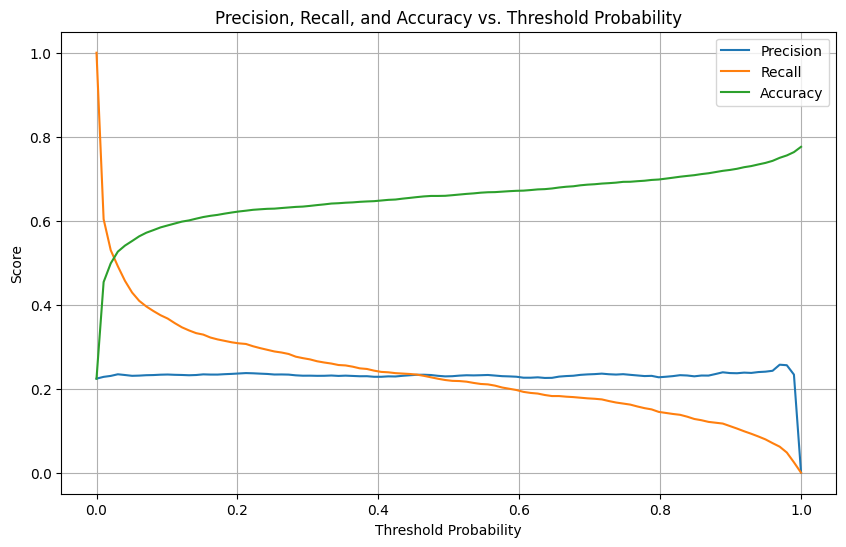

In [58]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy for different threshold probabilities
thresholds = np.linspace(0, 1, 100)
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot precision, recall, and accuracy against threshold probabilities
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs. Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()

### The above mode build on normalize data and few attrbute removed which result to loer accuracy rate of 0.776
